In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the compas score csv
compas_score_full = pd.read_csv('compas-scores-two-years.csv')
# print(compas_score_full.columns)

Data preview:
Columns:
id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count,start,end,event,two_year_recid

Rows:
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,,1,F,Aggravated Assault w/Firearm,0,,,,,,,,,0,,,,,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0

3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,,1,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),,2013-07-05,Felony Battery (Dom Strang),,,,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1

However not all of the rows are useable for the first round of analysis.

There are a number of reasons remove rows because of missing data:
* If the charge date of a defendants Compas scored crime was not within 30 days from when the person was arrested, we assume that because of data quality reasons, that we do not have the right offense.
* We coded the recidivist flag -- `is_recid` -- to be -1 if we could not find a compas case at all.
* In a similar vein, ordinary traffic offenses -- those with a `c_charge_degree` of 'O' -- will not result in Jail time are removed (only two of them).
* We filtered the underlying data from Broward county to include only those rows representing people who had either recidivated in two years, or had at least two years outside of a correctional facility.

In [3]:
cols = ['sex', 'age', 'age_cat', 'race', 'decile_score', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out','c_charge_degree', 'is_recid', 'score_text', 'priors_count.1', 'two_year_recid']
compas_score = compas_score_full[cols]

compas_score = compas_score[compas_score['days_b_screening_arrest'] <= 30]
compas_score = compas_score[compas_score['days_b_screening_arrest'] >= -30]
compas_score = compas_score[compas_score['is_recid'] != -1]
compas_score = compas_score[compas_score['c_charge_degree'] != 'O']
compas_score = compas_score[compas_score['score_text'] != 'N/A']

In [4]:
compas_score.head()

,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,priors_count.1,two_year_recid
0,Male,69,Greater than 45,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0,0
1,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,0,1
2,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,4,1
5,Male,44,25 - 45,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0,0
6,Male,41,25 - 45,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,14,1


#Data preview:

C:\Users\Marc\anaconda3\envs\LIME\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marc\anaconda3\envs\LIME\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marc\anaconda3\envs\LIME\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='race', ylabel='count'>

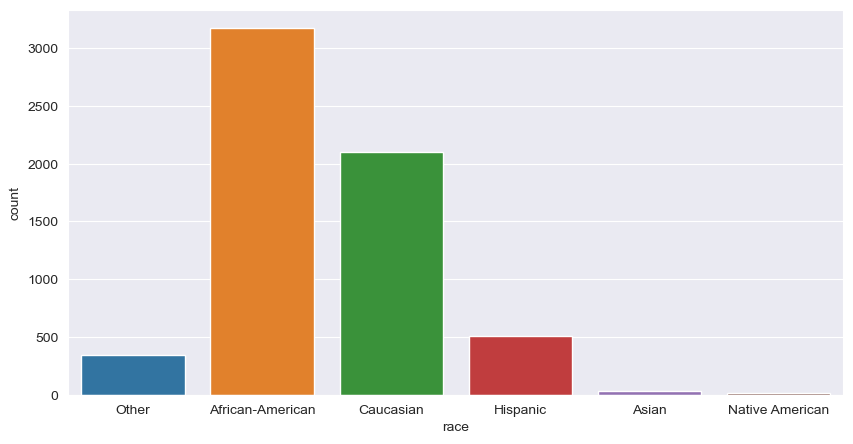

In [5]:
#create distribution plot for score_text in percent
plt.figure(figsize=(10,5))
sns.countplot(x='race', data=compas_score)

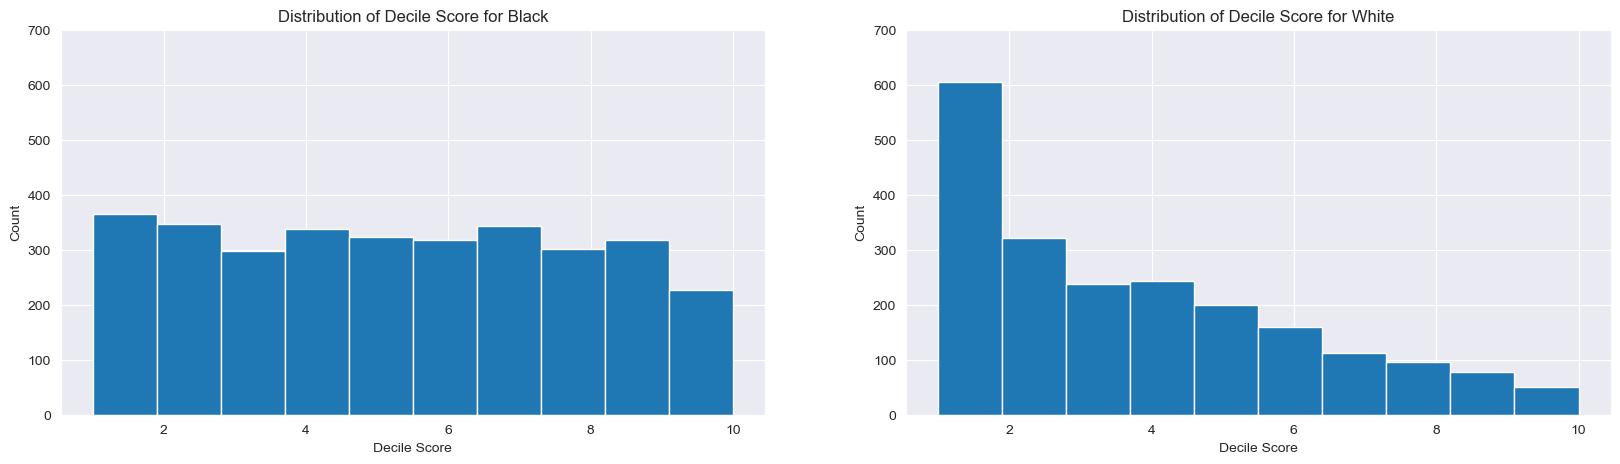

In [11]:
#histogram of age
#multiple plots next to each other
plt.figure(figsize=(20,5))

xblack = compas_score[compas_score['race']== 'African-American']
xwhite = compas_score[compas_score['race']== 'Caucasian']


plt.subplot(1,2,1)
plt.hist(xblack['decile_score'], label='black')
plt.ylim((0, 700))
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Distribution of Decile Score for Black')

plt.subplot(1,2,2)
plt.hist(xwhite['decile_score'], label='white')
plt.ylim((0, 700))
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Distribution of Decile Score for White')
plt.show()
